# Estatistica Prática para Cientista de Dados: 50 conceitos essenciais

## Capítulo 1: Análise Exploratória de Dados

### Estimativas de Localização (tendência central)
É comum as variáveis apresentarem valores distintos, para que possamos ter um valor central onde os dados se concentram utilizamos as estimativas de localização, as mais utilizadas são: média aritmética, média aparada, média ponderada, mediana e mediana ponderada. Abaixo realizo o cálculo da média aritmética e a média aparada para que possamos compreender o impacto dos valores extremos.

### Média aritmética
É a média mais simples. Calcula-se a soma dos valores e divide pelo total de valores. Apesar de ser simples, é uma medida sensível a outliers inferiores e superiores, o que pode distorcer o resultado final, por isso foram desenvolvidas outras medidas como alternativa a média para que possamos ser o mais próximo do valor central possível.

Outliers altos podem elevar o resultado da média, enquanto que outliers baixos podem decair o resultado da média, é preciso portanto haver uma espécie de "equilíbrio" entre os valores. Abaixo calculo a média aritmética de uma lista com dois outliers.

In [1]:
numeros = [12, 15, 14, 13, 16, 18, 20, 22, 19, 17, 14, 13, 15, 16, 200, 21, 23, 24, 22, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, -50]

In [2]:
soma  = 0
media = 0

In [3]:
for n in numeros:
    soma += n
media = soma / len(numeros)
print(round(media, 2))

19.97


### Média aparada
A média aparada remove os valores extremos que estejam afetando a média. É uma medida boa, contudo é preciso estar atento a perda de informação, aconselha-se criar uma cópia dos dados anteriores antes de rmeover os valores. Após a remoção dos outliers podemos calcular a média aritmética normalmente, claro que o tamanho da amostra será alterado e deve ser levado em consideração. Outra etapa importante para o cálculo da média aparada é a ordenação dos valores da lista, isso porque ela irá remover os valores das pontas, tantos os inferiores quanto os superiores.

### Explicando o exemplo
No exemplo abaixo é aparado dois valores extremos de forma manual, contudo a média aparada não lida com valores discretos e fixos, ela lida com percentual de remoção. No caso do nosso exemplo o percentual de remoção é de 6,66%, ou seja, 3,33% de cada ponta. No caso de não sabermos a quantidade exata de outliers devemos levar em consideração a análise realizada para aplicar o percentual correto de aparação, afinal perderemos informação, é preciso agir com cautela. 

In [4]:
copia_numeros = numeros.copy()

In [5]:
copia_numeros.sort()
print(copia_numeros)

[-50, 9, 10, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 19, 20, 21, 22, 22, 23, 24, 200]


Podemos verificar que os valores extremos são -50 e 200. Esses valores estão alterando o resultado final da média, vamos removê-los.

In [6]:
copia_numeros.remove(-50)
copia_numeros.remove(200)
print(copia_numeros)

[9, 10, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 19, 20, 21, 22, 22, 23, 24]


Vamos verificar se houve alteração no tamanho da lista, realizar essa verificação é importante.

In [7]:
print(f'Tamanho da lista original: {len(numeros)}') # tamanho da lista original
print(f'Tamanho da lista copiada: {len(copia_numeros)}') # tamanho da lista copiada

Tamanho da lista original: 30
Tamanho da lista copiada: 28


Agora vamos calcular a média normalmente

In [8]:
soma = 0
media = 0

In [9]:
for numero in copia_numeros:
    soma += numero
media = soma / len(copia_numeros)
print(round(media,2))

16.04


### Aplicando percentual de 6,66% na aparação dos valores da lista numeros
Ao final podemos verificar que o resultado foi o mesmo, mas como dito anteriormente, o valor de aparação foi dado de forma manual. Existe alguns percentuais padrões de acordo com a análise, que devem ser levados em consideração. Abaixo eu coloco uma pequena tabela com esses valores.

In [10]:
n = 0
k = 0

In [11]:
n = len(numeros)
k = int(0.0666 * n)

In [12]:
dados_ordenados = sorted(numeros)
aparados = dados_ordenados[k: n - k]

In [13]:
soma = 0
media = 0

In [14]:
for valor in aparados:
    soma += valor
media = soma / len(aparados)
print(round(media, 2))

16.04


### Tabela com alguns percentuais de uso padrão para aparação, de acordo com a aplicação
Os valores foram fornecidos e explicados pelo ChatGPT

| Aplicação | Percentual |
|-----------|------------|
| Estatísica Descritiva | 2,5% a 5% |
| Dados assimétricos | 10% a 20% |
| Estudos muito sensíveis a extremos | 20% a 25% |

### Executando o mesmo exemplo acima utilizando R puro sem funções internas ou bibliotecas externas

Para utilizar o R em um Kernel Python3:

1. instalar o pacote rpy2
2. iniciar o comando %load_ext rpy2.ipython
3. sempre que criar um código R é preciso iniciar a célula com %%R

In [15]:
!pip install rpy2

In [16]:
import os
os.environ["RPY2_CFFI_MODE"] = "ABI"
%load_ext rpy2.ipython

In [17]:
%%R
dados <- c(12, 15, 14, 13, 16, 18, 20, 22, 19, 17, 14, 13, 15, 16, 200, 21, 23, 24, 22, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, -50)
soma <- 0
media <- 0
for (dado in dados){
    soma <- soma + dado
}
media <- soma/length(dados)
print(media)

[1] 19.96667


In [18]:
%%R
tamanho <- length(dados)
aparacao <-as.integer( 0.0666 * tamanho)
ordenados <- sort(dados)

In [19]:
%%R
tamanho_aparacao <- as.integer(tamanho - aparacao)
dados_aparados <- ordenados[(aparacao + 1):(tamanho_aparacao)]

soma_ap <- 0
media_ap <- 0

for(d in dados_aparados){
    soma_ap <- soma_ap + d
}
media_ap <- soma_ap/length(dados_aparados)
print(media_ap)

[1] 16.03571


### Análise dos resultados

**Texto corrigido pelo ChatGPT:**

Tanto em R quanto em Python, obtive o mesmo resultado para a média aritmética (19,97) e para a média aparada (16,03).

A escolha de qual média utilizar na análise exploratória depende do contexto e das características dos dados. Existem casos em que valores extremos, ainda que fora do padrão, são relevantes e devem ser mantidos; em outros, sua presença pode distorcer significativamente as estimativas e comprometer a interpretação dos resultados.

Por isso, recomendo calcular ambas as médias quando houver suspeita de outliers. Se optar por manter a média aritmética, é importante mencionar a existência dos valores extremos e mostrá-los visualmente, por exemplo, por meio de um boxplot.

O que não é recomendável é apresentar a média como uma medida absoluta e representativa do conjunto de dados sem considerar outras estatísticas descritivas e a possível influência dos outliers.

**Texto original:**

Ambas linguagens R e Python deram o mesmo resultado para a média aritmética: 19.97 e média aparada: 16.03. Fica a pergunta: Qual média utilizar para continudade da análise exploratória? A resposta é: Depende da análise e dos dados, afinal há valores extremos que ainda sendo extremos é importante mantê-los, como há outros que sua permanência pode alterar significativamente os resultados posteriores. Aconselho realizar as duas médias se for o caso, e na escolha de manter a média aritmética faça referência aos outliers e os mostre visualmente pelo Boxplot. O que não recomendo é dar o média como valor absoluto e representativo dos dados, é preciso considerar outras medidas.

## Média Ponderada

A média ponderada é  uma medida estatística que considera a relevância dos valores no cálculo da média, essa relevância é dada pelo pesos atribuídos a cada valor. Diferente da média aritmética, é a soma dos pesos que divide o resultado da soma ponderada (a soma dos produtos entre valor e peso). Abaixo eu calculo a soma ponderada em Python e em R, novamente as duas linguagens obtiveram os mesmo resultado.

### Abrindo arquivo csv em Python e transferindo os valores para duas listas

In [20]:
valores = []
pesos = []

with open('peso_fixos.csv', 'r') as arquivo:
    linhas = arquivo.readlines()

    for linha in linhas[1:]:
        valor, peso = linha.strip().split(",")
        valores.append(float(valor))
        pesos.append(float(peso))

### Calculando a média ponderada em Python

In [21]:
soma_ponderada = 0
soma_pesos = 0
media_ponderada = 0

for v in valores:
    for p in pesos:
        soma_ponderada += v * p
        soma_pesos += p
media_ponderada = soma_ponderada/soma_pesos
print(round(media_ponderada,2))

16.33


### Abrindo arquivo csv em R e transferindo para duas listas

In [22]:
%%R
valores_pesos <- read.csv('peso_fixos.csv',header = TRUE, sep=",")

valores_r <- valores_pesos$valor
pesos_r <- valores_pesos$peso

### Calculando média ponderada em R

In [23]:
%%R
soma_pd <- 0
soma_ps <- 0
media_pd <- 0

for (vl in valores_r){
    for (ps in pesos_r){
        soma_pd <- soma_pd + (vl *ps)
        soma_ps <- soma_ps + ps
    }
}

media_pd <- soma_pd/soma_ps
print(media_pd)

[1] 16.33333


## Mediana

A mediana é uma das medidas das estimativas de localização, sendo muito utilizada em comparação com a média por ser robusta a outliers. Mesmo que eu tenha valores extremos o resultado da mediana não é atingido porque se trata do valor central que divide o conjunto de dados entre maiores que a mediana e menores que a mediana. O cálculo da mediana lida bem com conjunto de dados ímpares, sendo a mediana o valor central, mas também com conjuntos pares, sendo a mediana a média entre os dois valores centrais. Abaixo eu calculo a mediana em Python e em R, o mais interessante de ter feito a mediana em R é a descoberta de que a indexação em R começa em 1 e isso alterou um pouco a forma de acessar os valores centrais.

### Calculando mediana em Python

In [24]:
numeros_ordenados = sorted(numeros)

In [25]:
def mediana(numeros):
    t = len(numeros)
    meio = t // 2
    mediana = 0
    if t % 2 == 0:
        mediana = (numeros[meio - 1] + numeros[meio])/2
    else:
        mediana = numeros[meio]
    return mediana
print(mediana(numeros_ordenados))

15.5


### Calculando mediana em R

In [26]:
%%R -i numeros_ordenados
mediana <- function(numeros){
    numeros <- as.numeric(numeros_ordenados)
    t <- length(numeros)
    meio <- t / 2
    med <- 0
    if(t %% 2 == 0){
        med <- (numeros[meio] + numeros[meio + 1])/2
    }else{
        meio <- ceiling(meio)
        med <- numeros[meio]
    }
    return(med)
}
mediana(numeros_ordenados)

[1] 15.5


## Mediana Ponderada

Usarei um trecho do livro em que o autor explica mediana ponderada e posteriormente explico como analisar o seu resultado, vamos ao trecho:

"_Em vez de um número central, a mediana ponderada é um valor cuja a soma dos pesos é igual para as metades superior e inferior da lista classificada_"

### Calculando mediana ponderada em Python

In [27]:
dic_valores = {10: 1, 12: 2, 15: 3, 18: 2, 20: 2}
dic_valores

{10: 1, 12: 2, 15: 3, 18: 2, 20: 2}

In [28]:
sum_v = 0
w = 0
for v in dic_valores.values():
    sum_v += v
    w = sum_v // 2
print(f'Peso acumulado: {sum_v}')
print(f'Peso acumulado divido por dois: {w}')

Peso acumulado: 10
Peso acumulado divido por dois: 5


In [29]:
acumula_pesos = 0
mediana_ponderada = 0
for val, ps in dic_valores.items():
    acumula_pesos += ps
    if acumula_pesos >= w:
        mediana_ponderada = val
        break
print(f'Mediana ponderada: {mediana_ponderada}')
print(acumula_pesos)

Mediana ponderada: 15
6


### Compreendendo o resultado

A mediana ponderada é 15 porque se olharmos o nosso conjunto de dados veremos que o peso acumulado é 10 e sua divião por 2 é 5, precisamos então encontrar nos dados o exato momento em que o valor 5 é atingido, se formos ver, até o 12 esse valor não é atingido porque a soma dos pesos da 4, logo quando chegamos ao 15 temos o resultado 5 atingido, sendo a soma dos pesos igual a 6, por isso o resultado é 15.

Em caso de haver dois valores que atinjam a divisão do peso acumulado, podemos considerar o valor que o atinge primeiro, nesse caso supondo que 12 e 15 alcançasse 5, o resultado seria 12, porque é o primeiro valor que atinge a divisão do peso acumulado.

### Calculando mediana ponderada em R

Em R não temos estruturas como dicionário em Python, uma das formas de simular estrutura chave e valor  é utilizando lista de forma que a chaves estejam entre aspas ou não sejam números, posteriormente atribuímos o valor a cada uma delas. Essa foi uma descoberta muito interessante e a forma como acessar os valores foi muito sutil utilizando o método names() e passando para ele o nome da lista. O restante do cálculo foi igual ao do Python. É muito bom trabalhar com duas linguagens opostas em sintaxe e estrutura de dados.

In [30]:
%%R
dados <- list("10" = 1,"12" = 2, "15" = 3, "18" = 2, "20" = 2)
dados

$`10`
[1] 1

$`12`
[1] 2

$`15`
[1] 3

$`18`
[1] 2

$`20`
[1] 2



In [31]:
%%R
soma <- 0
peso <- 0

for(dado in names(dados)){
  soma <- soma + dados[[dado]]
  peso <- soma / 2
}
print(soma)
print(peso)

[1] 10
[1] 5


In [32]:
%%R
acum <- 0
med_ponderada <- 0

for(valor in names(dados)){
  acum <- acum + dados[[valor]]
  if(acum >= peso){
    med_ponderada = valor
    break
  }
}
print(med_ponderada)

[1] "15"


## Análise da base de dados State sobre taxa de homícidio dada a população e o estado, em Python

Nessa primeira fase da análise vamos extrair as seguintes estimativas de localização:

1. Média
2. Média Aparada com aparação de 10% dos dados
3. Mediana
4. Média Ponderada
5. Mediana Ponderada

_A ordem das estimativas segue a ordem do livro_

Para essa análise precisei utilizar quatro bibliotecas, vamos a elas:

1. Pandas para exploração inicial dos dados
2. Numpy para cálculos da Média, Média Ponderada e Mediana
3. Scipy importando o módulo Stats para cálculo da Média Aparada
4. Wquantiles para o cálculo da Mediana Ponderada

In [33]:
import pandas as pd
import numpy as np

In [34]:
from scipy import stats

In [35]:
df = pd.read_csv('state.csv')
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [36]:
df.shape

(50, 4)

In [37]:
df.isnull().sum()

State           0
Population      0
Murder.Rate     0
Abbreviation    0
dtype: int64

In [38]:
df.dtypes

State            object
Population        int64
Murder.Rate     float64
Abbreviation     object
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [40]:
df.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


## Primeiras observações e estimativas de localização

Não possuimos dados nulos nem dados que necessitam de tratamento, todos estão em tipos de dados adequados para cálculos estatísticos ou manipulação de strings (no caso de dados do tipo Object)

Abaixo temos o cálculo das estimativas de localização

In [41]:
# Média
np.mean(df["Population"])

np.float64(6162876.3)

In [42]:
# Média Aparada
stats.trim_mean(df["Population"], 0.1)

np.float64(4783697.125)

In [43]:
# Média Ponderada
np.average(df["Murder.Rate"],None,df["Population"])

np.float64(4.445833981123393)

In [44]:
# Mediana
np.median(df["Population"])

np.float64(4436369.5)

In [45]:
!pip install wquantiles

In [46]:
# Mediana Ponderada
import wquantiles
wquantiles.median(df["Murder.Rate"], df["Population"])

np.float64(4.4)

## Análise da base de dados State sobre taxa de homícidio dada a população e o estado, em R

Nessa primeira fase da análise vamos extrair as seguintes estimativas de localização:

1. Média
2. Média Aparada com aparação de 10% dos dados
4. Mediana
5. Média Ponderada
6. Mediana Ponderada

_A ordem das estimativas segue a ordem do livro_

A linguagem R possui pacotes e funções estatísticas internas que facilitam o cálculo das estimativas tanto que apenas precisei instalar um pacote externo: MatrixStats para calcular a Mediana Ponderada. Isso é incrível!

In [47]:
%%R -i df
#Média em R
mean(df$Population)

[1] 6162876


In [48]:
%%R
# Média Aparada em R
mean(df$Population, trim=0.1)

[1] 4783697


In [49]:
%%R
# Mediana e R
median(df$Population)

[1] 4436370


In [50]:
%%R
# Média Ponderada em R
weighted.mean(df[["Murder.Rate"]], w=df[["Population"]])

[1] 4.445834


In [51]:
%%R
install.packages("matrixStats")

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xe3 in position 83: invalid continuation byte <traceback object at 0x00000187DE56FDC0>
R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xe3 in position 56: invalid continuation byte <traceback object at 0x00000187EE3CF780>



pacote 'matrixStats' desempacotado com sucesso e somas MD5 verificadas



R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xe1 in position 14: invalid continuation byte <traceback object at 0x00000187DE552D80>


trying URL 'https://vps.fmvz.usp.br/CRAN/bin/windows/contrib/4.5/matrixStats_1.5.0.zip'
Content type 'application/zip' length 559266 bytes (546 KB)
downloaded 546 KB



In [52]:
%%R
library("matrixStats")
# Mediana Ponderada em R
weightedMedian(df[["Murder.Rate"]], w=df[["Population"]])

[1] 4.4


## Estimativa de Variabilidade

Após encontramos as estimativas de localização (tendência central) que nos informa qual valor divide o nosso conjunto de dados entre valores inferiores e superiores, precisamos compreender o quanto eles se dispersam deste valor central. É neste momento que aplicamos as estimativas de variabilidde  (dispersão), sendo as mais comuns: variância, desvio padrão e medidas baseadas em percentis. Vamos compreendê-las com um conjunto de dados simples e posteriormente com a base State.

### Estimativas baseadas no desvio

O cálculo do desvio nos informa o quanto os dados estão se desviando da média. É uma medida sensível a outliers, contudo é mais preferível do que a variância. No livro o autor mostra três formas de calcular o desvio, são elas:

1. Desvio Absoluto Médio: A soma das diferenças entre os valores e a média
2. Desvio Absoluto Mediano: A mediana dos desvios
3. Desvio Padrão: Raiz quadrada da variância.
4. Variância (Amostral): A soma das diferenças entre os valores e a média elevada ao quadrado e posteriormente dividida pela quantidade de elementos - 1

_Como usaremos a lib Numpy passaremos os dados diretamente, mas em caso de cálculo manual é preciso calcular a variância antes de calcular o desvio padrão._

**Desvio Absoluto Médio**

In [53]:
dados = [1,4,4]

media = np.mean(dados)

def stdMedio(dados):
    dif = 0
    for x in dados:
        dif += (abs(x - media))
    return dif
    
round(stdMedio(dados),2)

np.float64(4.0)

**Desvio Absoluto Mediano**

In [54]:
dados = [1,1,2,2,4,6,9]
mediana = np.median(dados)

def stdMediano(mediana, dados):
    dif = []
    for x in dados:
        dif.append(abs(x - mediana))
    return dif

stdMediano = stdMediano(mediana, dados)
np.median(stdMediano)

np.float64(1.0)

**Desvio Padrão**

In [55]:
# o ddof permite que trabalhemos como desvio padrão amostral
round(np.std(dados, ddof = 1),2)

np.float64(2.99)

## Estimativas baseadas em Percentis

Anteriormente, falamos sobre as estimativas baseadas em desvio. Uma das aplicações desse tipo de análise é o estudo do desempenho de turmas em um exame. Quando as médias estão muito dispersas em relação à média central, podemos afirmar que os resultados foram mais heterogêneos do que homogêneos, indicando uma distribuição assimétrica. Essa informação nos leva a investigar as possíveis causas da dispersão. Trata-se de um exemplo simples, mas que ilustra bem a utilidade das estimativas de dispersão.

Agora, vamos abordar as estimativas baseadas em **percentis**, que estão relacionadas à forma como os dados se distribuem. Elas são mais bem interpretadas por meio de visualizações, como o **Boxplot**, que evidencia a existência de *outliers* e mostra como os dados se concentram em torno da **mediana** (ou segundo quartil, 50%).

A seguir, analisamos o cálculo da **amplitude interquartil (AIQ)**, uma medida mais robusta do que a amplitude simples — que representa apenas a diferença entre o maior e o menor valor do conjunto. A amplitude simples é sensível a valores extremos, enquanto a amplitude interquartil considera apenas os dados entre o primeiro (Q1) e o terceiro quartil (Q3), eliminando uma proporção dos valores mais baixos e mais altos. Dessa forma, obtemos uma medida mais estável de dispersão.

A tabela abaixo, que elaborei a partir dos dados fornecidos pelo autor, mostra o particionamento dos dados, as medianas de cada parte e a diferença entre Q3 e Q1. Logo abaixo, apresento os resultados obtidos pelos cálculos manuais e pelas funções de bibliotecas do **Python** e do **R**. Observa-se que há pequenas diferenças entre os resultados.

Essas diferenças não significam que um método esteja certo e o outro errado. Na prática, utilizamos os valores retornados pelas funções padrão, mas é possível ajustar o método de cada biblioteca para reproduzir o cálculo manual. A variação ocorre porque existem diversas formas de calcular a amplitude interquartil — assim como há diferentes métodos para calcular uma raiz quadrada. Como o próprio autor destaca, não devemos nos preocupar com isso: basta compreender que os métodos variam e que essa diferença é natural.

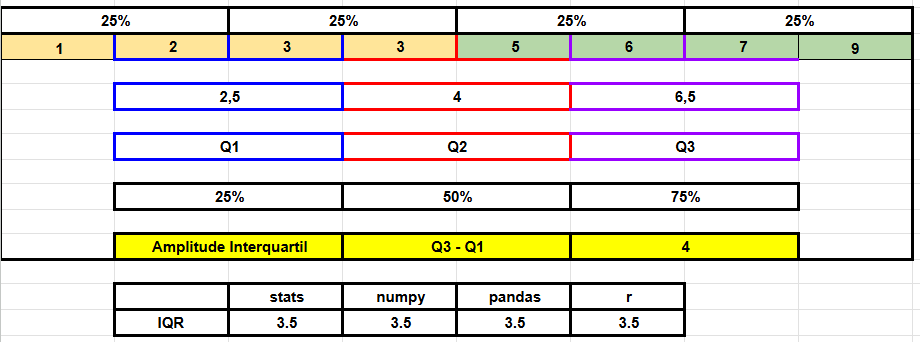

In [56]:
dados = [1,2,3,3,5,6,7,9]

Q1 = dados[0:4] # 25%
Q2 = np.median(dados) # 50%
Q3 = dados[4:] # 75%

mediana_Q1, mediana_Q3 = np.median(Q1), np.median(Q3)

# Amplitude Interquartil
IQR = mediana_Q3 - mediana_Q1
IQR

np.float64(4.0)

**Amplitude Interquartil com Numpy**

In [57]:
Q3, Q1 = np.percentile(dados, q=[75,25])
IQR = Q3 - Q1
IQR

np.float64(3.5)

**Amplitude Interquartil com Pandas**

In [58]:
valores = pd.Series(dados)
Q3, Q1 = valores.quantile(0.75), valores.quantile(0.25)
IQR  = Q3 - Q1
IQR

np.float64(3.5)

**Amplitude Interquartil com Scipy**

In [59]:
from scipy import stats
stats.iqr(dados)

np.float64(3.5)

**Amplitude Interquartil com R**

In [60]:
%%R -i dados

IQR(dados)

[1] 3.5


## Aplicando as estimativas de variabilidade na base State em Python

Para essa análise serão aplicadas apenas as medidas de:

1. Desvio Padrão
2. Desvio Absoluto Mediano
3. Amplitude Interquartil

_A aplicação das medidas foi de escolha do autor_

In [61]:
# Desvio Padrão
np.std(df["Population"], ddof=1)

np.float64(6848235.347401142)

In [62]:
# Desvio Absoluto Mediano
stats.median_abs_deviation(df["Population"])

np.float64(2596702.0)

In [63]:
# Amplitude Interquartil
stats.iqr(df["Population"])

np.float64(4847308.0)

## Aplicando as estimativas de variabilidade na base State em R

Para essa análise serão aplicadas apenas as medidas de:

1. Desvio Padrão
2. Desvio Absoluto Mediano
3. Amplitude Interquartil

_A aplicação das medidas foi de escolha do autor_

In [64]:
%%R 
# Desvio Padrão
sd(df$Population)

[1] 6848235


In [65]:
%%R
# Desvio Absoluto Mediano
mad(df$Population)

[1] 3849870


In [66]:
%%R
# Amplitude Interquartil
IQR(df$Population)

[1] 4847308
